# Retrieving Data from [Bitinfocharts](https://bitinfocharts.com)

- Get data from Bitinfocharts
- Extract date and count
- Check for null and na (save them - may need to interpolate missing values)
- Remove null and na variable
- Save dataset

In [1]:
import requests 
from bs4 import BeautifulSoup
import pandas as pd
import re
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
import seaborn as sns
sns.set_theme()

In [2]:
def parse_strlist(sl):
    clean = re.sub("[\[\],\s]","",sl)
    splitted = re.split("[\'\"]",clean)
    values_only = [s for s in splitted if s != '']
    return values_only

In [43]:
#url = 'https://bitinfocharts.com/comparison/tweets-btc.html#alltime'
url = 'https://bitinfocharts.com/comparison/tweets-eth.html#alltime'

In [44]:
response = requests.get(url)

In [45]:
soup = BeautifulSoup(response.text, 'html.parser')

In [46]:
scripts = soup.find_all('script')

In [47]:
for script in scripts:
    if 'd = new Dygraph(document.getElementById("container")' in script.text:
        StrList = script.text
        StrList = '[[' + StrList.split('[[')[-1]
        StrList = StrList.split(']]')[0] +']]'
        StrList = StrList.replace("new Date(", '').replace(')','')
        dataList = parse_strlist(StrList)

date = []
tweet = []
for each in dataList:
    if (dataList.index(each) % 2) == 0:
        date.append(each)
    else:
        tweet.append(each)

df = pd.DataFrame(list(zip(date, tweet)), columns=["Date","Ethereum - Tweets"])

In [48]:
df['Date'] = pd.to_datetime(df['Date'])

In [49]:
i = 0
nulls =[]

In [50]:
i = 0
for each in df['Ethereum - Tweets']:
    #print(each)
    if each=='null':
        df['Ethereum - Tweets'][i] = 0
        nulls.append(df.loc[i])
    else:
        df['Ethereum - Tweets'][i] = int(each)
    i +=1


/var/folders/zm/bf3yd8d526x62v9mglx0hpqw0000gn/T/ipykernel_61376/1821058836.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ethereum - Tweets'][i] = int(each)
/var/folders/zm/bf3yd8d526x62v9mglx0hpqw0000gn/T/ipykernel_61376/1821058836.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Ethereum - Tweets'][i] = 0


In [51]:
nulls = pd.DataFrame(nulls)

In [52]:
df.drop(index=nulls.index, inplace= True)

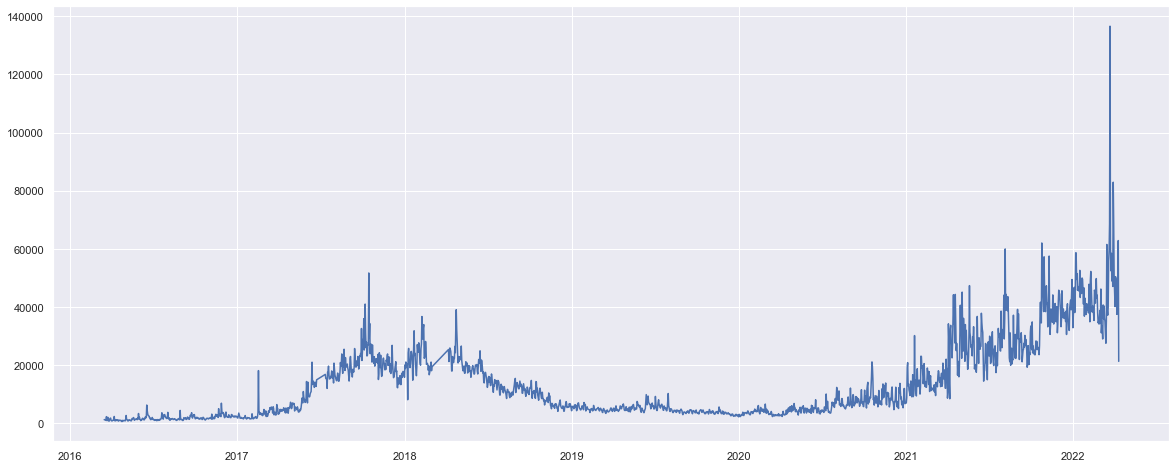

In [54]:
f = plt.figure()
f.set_figwidth(20)
f.set_figheight(8)
plt.plot(df['Date'],df['Ethereum - Tweets'],)

plt.show()

In [58]:
#df.to_excel('Datasets/btc-bitinfocharts.xlsx')
#df.to_excel('Datasets/test-bitinfocharts.xlsx')